# Base Functionalities for MS-based proteomics

AlphaBase can calculate MS coordinates for precursors and fragments that belong to (modified) peptide sequences

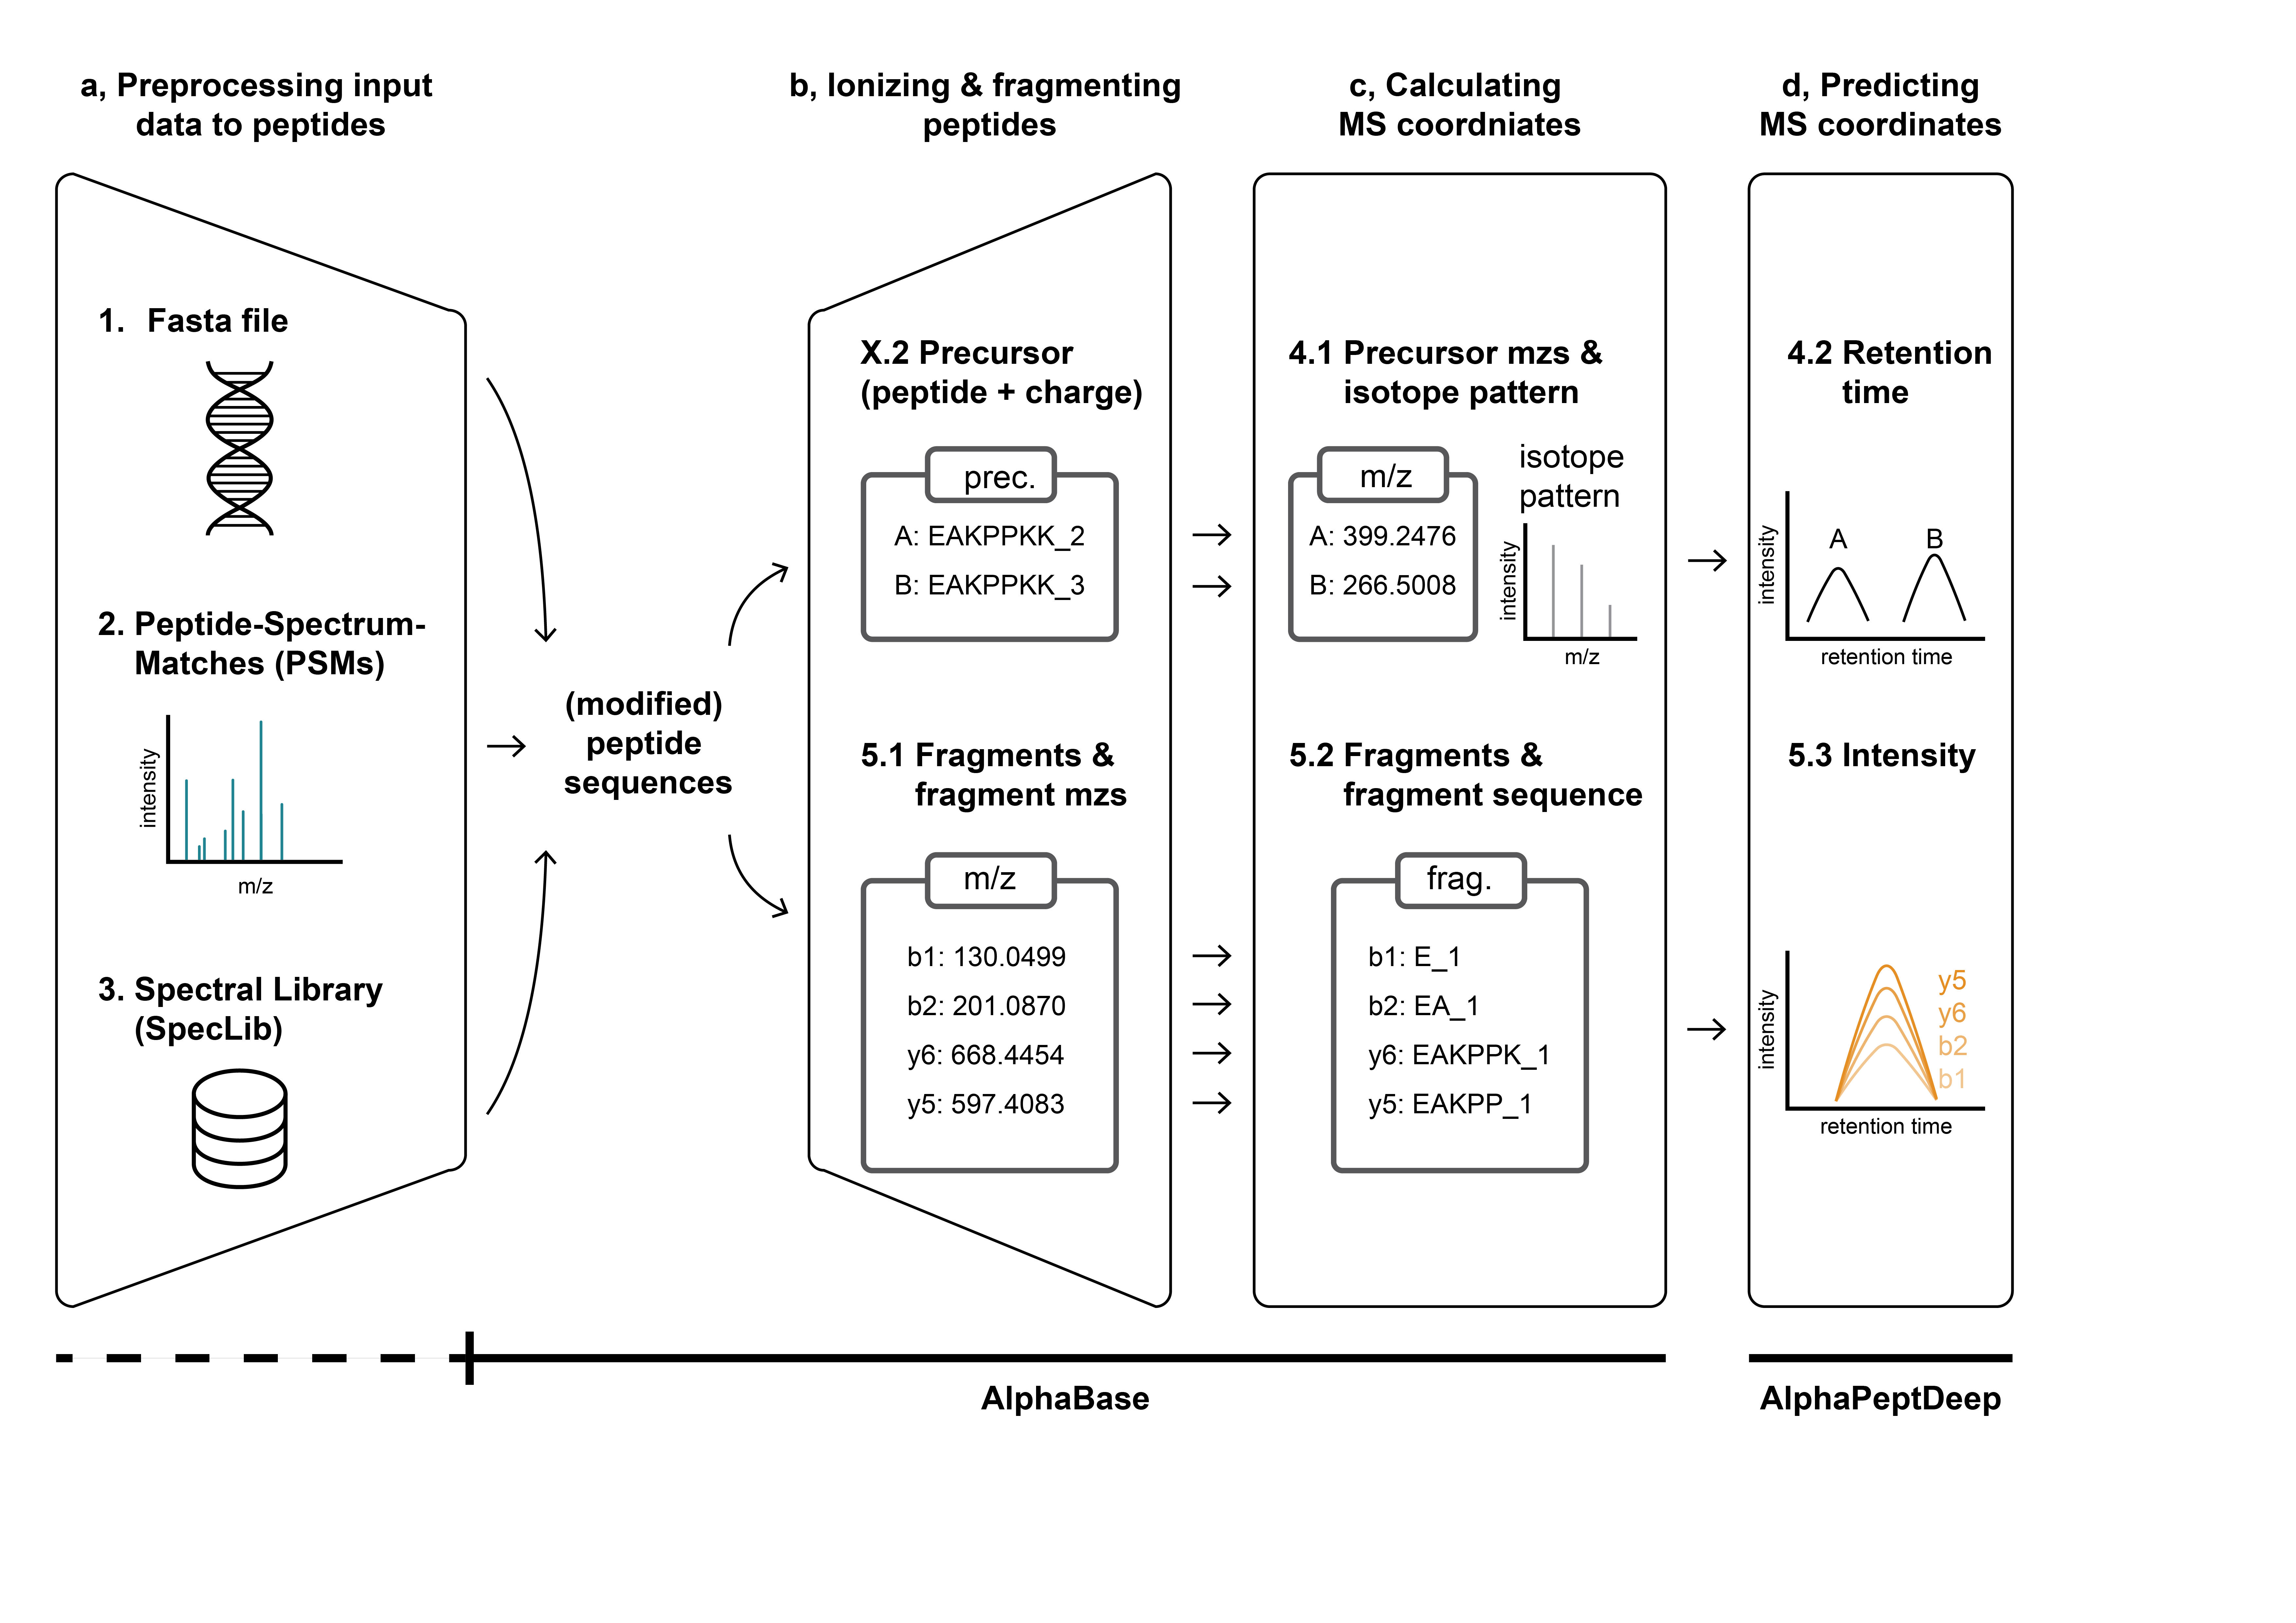

In [1]:
from IPython.display import Image
Image(filename='data/AlphaBase_figure1.png')

## 1. From Fasta file to MS coordinates

### 1.1 From Fasta file to (modified) peptide sequences

AlphaBase supports many different proteases for digestion represented by regular expressions.

In [2]:
from alphabase.protein.fasta import protease_dict
protease_dict

{'arg-c': 'R',
 'asp-n': '\\w(?=D)',
 'bnps-skatole': 'W',
 'caspase 1': '(?<=[FWYL]\\w[HAT])D(?=[^PEDQKR])',
 'caspase 2': '(?<=DVA)D(?=[^PEDQKR])',
 'caspase 3': '(?<=DMQ)D(?=[^PEDQKR])',
 'caspase 4': '(?<=LEV)D(?=[^PEDQKR])',
 'caspase 5': '(?<=[LW]EH)D',
 'caspase 6': '(?<=VE[HI])D(?=[^PEDQKR])',
 'caspase 7': '(?<=DEV)D(?=[^PEDQKR])',
 'caspase 8': '(?<=[IL]ET)D(?=[^PEDQKR])',
 'caspase 9': '(?<=LEH)D',
 'caspase 10': '(?<=IEA)D',
 'chymotrypsin high specificity': '([FY](?=[^P]))|(W(?=[^MP]))',
 'chymotrypsin low specificity': '([FLY](?=[^P]))|(W(?=[^MP]))|(M(?=[^PY]))|(H(?=[^DMPW]))',
 'chymotrypsin': '([FLY](?=[^P]))|(W(?=[^MP]))|(M(?=[^PY]))|(H(?=[^DMPW]))',
 'clostripain': 'R',
 'cnbr': 'M',
 'enterokinase': '(?<=[DE]{3})K',
 'factor xa': '(?<=[AFGILTVM][DE]G)R',
 'formic acid': 'D',
 'glutamyl endopeptidase': 'E',
 'glu-c': 'E',
 'granzyme b': '(?<=IEP)D',
 'hydroxylamine': 'N(?=G)',
 'iodosobenzoic acid': 'W',
 'lys-c': 'K',
 'lys-n': '\\w(?=K)',
 'ntcb': '\\w(?=C)',
 'peps

AlphaBase also supports arbitray digestion if the correct regular expression is designed, for example if you would like to combine `trypsin` (`[KR]`), `asp-n` (`\\w(?=D)`, cleave before `D`), and `lys-n` (`\\w(?=K)`, cleave before `K`), the final regular expression would be `([KR]|\\w(?=D)|\\w(?=K))`.

AlphaBase enables the digestions of single protein sequences to (modified) peptides with the `alphabase.protein.fasta.Digest` class.

In [3]:
from alphabase.protein.fasta import Digest

digest = Digest(
    protease="trypsin",
    max_missed_cleavages=2,
    peptide_length_min=7,
    peptide_length_max=45,
)
protein_sequence = "MGDQPCASGRSTLPPGNAREAKPPKKRCLLAPRWDYPEGTPNGGSTTLPSAPPPASAGLKSHPPPPEK" #A0A0U1RRE5, NBDY_HUMAN
seqs, miss_cleaves, prot_nterms, prot_cterms = digest.cleave_sequence(protein_sequence)
seqs, miss_cleaves, prot_nterms, prot_cterms

(['MGDQPCASGR',
  'MGDQPCASGRSTLPPGNAR',
  'MGDQPCASGRSTLPPGNAREAK',
  'STLPPGNAR',
  'STLPPGNAREAK',
  'STLPPGNAREAKPPK',
  'EAKPPKK',
  'KRCLLAPR',
  'RCLLAPR',
  'RCLLAPRWDYPEGTPNGGSTTLPSAPPPASAGLK',
  'CLLAPRWDYPEGTPNGGSTTLPSAPPPASAGLK',
  'CLLAPRWDYPEGTPNGGSTTLPSAPPPASAGLKSHPPPPEK',
  'WDYPEGTPNGGSTTLPSAPPPASAGLK',
  'WDYPEGTPNGGSTTLPSAPPPASAGLKSHPPPPEK',
  'WDYPEGTPNGGSTTLPSAPPPASAGLKSHPPPPEK',
  'SHPPPPEK',
  'SHPPPPEK',
  'GDQPCASGR',
  'GDQPCASGRSTLPPGNAR',
  'GDQPCASGRSTLPPGNAREAK'],
 [0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2],
 [True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  False,
  False])

AlphaBase also enables the digestion of a complete fasta file to (modified) peptides with the `alphabase.alphabase.protein.fasta.SpecLibFasta` class.

In [4]:
from alphabase.protein.fasta import SpecLibFasta

# The SpecLibFasta can perform following steps:
# - Load fasta files into a protein_dict
# - Digest proteins into peptide sequences
# - Append decoy peptide sequences if self.decoy is not None
# - Add fixed and variable modifications
# - [Add special modifications]
# - [Add peptide labeling]
# - Add charge states to peptides

# define how the fasta file should be digested to peptides
fasta_lib = SpecLibFasta(
    charged_frag_types = ["b_z1", "b_z2", "y_z1", "y_z2"],
    protease = "trypsin",
    max_missed_cleavages = 2,
    peptide_length_min = 7,
    peptide_length_max = 35,
    precursor_charge_min = 2,
    precursor_charge_max = 4,
    precursor_mz_min = 400.0,
    precursor_mz_max = 2000.0,
    var_mods = ["Acetyl@Protein_N-term", "Oxidation@M"],
    min_var_mod_num = 0,
    max_var_mod_num = 2,
    fix_mods = ["Carbamidomethyl@C"],
    labeling_channels = None,
    special_mods = [],
    min_special_mod_num = 0,
    max_special_mod_num = 1,
    special_mods_cannot_modify_pep_n_term = False,
    special_mods_cannot_modify_pep_c_term = False,
    decoy = None,
    include_contaminants = False,
    I_to_L = False,
)

# fastalib.import_and_process_fasta(fasta_files=[...])

In [5]:
# define the path to a fasta file
fasta_files = ["data/sample_proteins.fasta"]

# generate a list of peptide sequences based on the fasta file
fasta_lib.get_peptides_from_fasta(fasta_files) 

# add the columns: protein and gene names
fasta_lib.append_protein_name() 

# add sequences with variable and fixed modifications
fasta_lib.add_modifications() 

# dataframe that contains all generated peptide information
fasta_lib.precursor_df

,sequence,protein_idxes,miss_cleavage,is_prot_nterm,is_prot_cterm,mods,mod_sites,nAA,proteins,genes
0,EAKPPKK,5,2,False,False,,,7,A0A0U1RRE5,NBDY
1,VLEGRFR,2,1,False,False,,,7,A0A0B4J2F2,SIK1B
2,LESSQPR,7,0,False,False,,,7,A0AV02,SLC12A8
3,FSVSTLR,0,0,False,False,,,7,A0A087X1C5,CYP2D7
4,AFRQQLR,2,1,False,False,,,7,A0A0B4J2F2,SIK1B
...,...,...,...,...,...,...,...,...,...,...
1000,IQAVLAVQGPLLLSRDPAQYCHAVWGDPDSPNYHR,6,1,False,False,Carbamidomethyl@C,21,35,A0A1B0GTW7,CIROP
1001,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Carbamidomethyl@C;Carbamidomethyl@...,20;8;18;26,35,A0A0B4J2F2,SIK1B
1002,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Carbamidomethyl@C;Carbamidomethyl@...,24;8;18;26,35,A0A0B4J2F2,SIK1B
1003,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Oxidation@M;Carbamidomethyl@C;Carb...,20;24;8;18;26,35,A0A0B4J2F2,SIK1B


In [6]:
# add phospho as modification to the peptide sequences
from alphabase.protein.fasta import append_special_modifications

fasta_lib._precursor_df = append_special_modifications(
    fasta_lib.precursor_df, ['Phospho@S','Phospho@T'],
    min_mod_num=0, max_mod_num=1, max_peptidoform_num=100
)
fasta_lib.precursor_df

,sequence,protein_idxes,miss_cleavage,is_prot_nterm,is_prot_cterm,mods,mod_sites,nAA,proteins,genes
0,EAKPPKK,5,2,False,False,,,7,A0A0U1RRE5,NBDY
1,VLEGRFR,2,1,False,False,,,7,A0A0B4J2F2,SIK1B
2,LESSQPR,7,0,False,False,Phospho@S,3,7,A0AV02,SLC12A8
3,LESSQPR,7,0,False,False,Phospho@S,4,7,A0AV02,SLC12A8
4,LESSQPR,7,0,False,False,,,7,A0AV02,SLC12A8
...,...,...,...,...,...,...,...,...,...,...
3006,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Oxidation@M;Carbamidomethyl@C;Carb...,20;24;8;18;26;30,35,A0A0B4J2F2,SIK1B
3007,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Oxidation@M;Carbamidomethyl@C;Carb...,20;24;8;18;26,35,A0A0B4J2F2,SIK1B
3008,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26;27,35,A0A0B4J2F2,SIK1B
3009,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26;30,35,A0A0B4J2F2,SIK1B


In [7]:
# AlphaBase provides the option to generate decoys in a specific format
fasta_lib.decoy = 'diann'
fasta_lib.append_decoy_sequence()
fasta_lib.precursor_df.sample(5, random_state=0)

,sequence,protein_idxes,miss_cleavage,is_prot_nterm,is_prot_cterm,mods,mod_sites,nAA,proteins,genes,decoy
5151,SEGTQPEGTYGEQLVPELCNQSESSGEDFFLK,7,0,False,False,Carbamidomethyl@C,19,32,A0AV02,SLC12A8,0
2088,VTEGVLDVIVYASAADKMK,8,1,False,False,Oxidation@M,18,19,A0AV96,RBM47,0
3145,ENQEGLAEAVLEALASKGGTLR,6,1,False,False,Phospho@S,16,22,A0A1B0GTW7,CIROP,1
4230,ATPGLHLGSASNFSFFRWMRSLLLPSSR,7,2,False,False,Carbamidomethyl@C,27,28,A0AV02,SLC12A8,1
1519,VSPGCPIVGTHVCPVR,0,0,False,False,Carbamidomethyl@C;Carbamidomethyl@C;Phospho@T,5;13;10,16,A0A087X1C5,CYP2D7,0


### 1.2 From (modified) peptide sequences to precursors (peptide sequence & charge state)

In [8]:
# apply charge states to the peptide sequences to generate precursor information.
fasta_lib.add_charge()
fasta_lib.precursor_df[['sequence','mods','mod_sites','charge']]

,sequence,mods,mod_sites,charge
0,EAKPPKK,,,2
1,EAKPPKK,,,3
2,EAKPPKK,,,4
3,FDYDDLR,,,2
4,FDYDDLR,,,3
...,...,...,...,...
18061,SLRSPQEQIILAPSLAKVDMEMTQLTQENADFATR,Phospho@S,1,3
18062,SLRSPQEQIILAPSLAKVDMEMTQLTQENADFATR,Phospho@S,1,4
18063,LLRLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLLQ,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26,2
18064,LLRLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLLQ,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26,3


In [9]:
fasta_df = fasta_lib.precursor_df

## 2. From PSM file to MS coordinates

In [10]:
from alphabase.psm_reader import (
    # DDA
    AlphaPeptReader,
    pFindReader,
    MaxQuantReader,
    SageReaderTSV,
    SageReaderParquet,
    MSFragger_PSM_TSV_Reader,
    MSFraggerPepXML,
    # DIA
    DiannReader,
    SpectronautReader,
    SpectronautReportReader,
    SwathReader,
)

### 2.1 & 2.2 From PSM file to (modified) peptide sequences & to precursors

`alphabase.psm_reader.psm_reader_provider` has basic reader classes for several search engine results

In [11]:
from alphabase.psm_reader import psm_reader_provider
psm_reader_provider.reader_dict

{'alphapept': alphabase.psm_reader.alphapept_reader.AlphaPeptReader,
 'spectronaut': alphabase.psm_reader.dia_psm_reader.SpectronautReader,
 'speclib_tsv': alphabase.psm_reader.dia_psm_reader.SpectronautReader,
 'openswath': alphabase.psm_reader.dia_psm_reader.SwathReader,
 'swath': alphabase.psm_reader.dia_psm_reader.SwathReader,
 'diann': alphabase.psm_reader.dia_psm_reader.DiannReader,
 'spectronaut_report': alphabase.psm_reader.dia_psm_reader.SpectronautReportReader,
 'msfragger_psm_tsv': alphabase.psm_reader.msfragger_reader.MSFragger_PSM_TSV_Reader,
 'msfragger': alphabase.psm_reader.msfragger_reader.MSFragger_PSM_TSV_Reader,
 'msfragger_pepxml': alphabase.psm_reader.msfragger_reader.MSFraggerPepXML,
 'maxquant': alphabase.psm_reader.maxquant_reader.MaxQuantReader,
 'pfind': alphabase.psm_reader.pfind_reader.pFindReader,
 'pfind3': alphabase.psm_reader.pfind_reader.pFindReader,
 'sage_tsv': alphabase.psm_reader.sage_reader.SageReaderTSV,
 'sage_parquet': alphabase.psm_reader.sage

DIA-NN does not provide the m/zs for precursors and fragments by default. Therefore, you might want to calculate the MS 
coordinates yourself based on the (modified) peptide sequences as illustraded below.

In [12]:
# define the path to a psm file
tsv_file = "data/sample_diann_report.tsv"

# load the psm file. At this step, AlphaBase already calculates precursor information such as precursor m/z.
diann_psm_df  = psm_reader_provider.get_reader('diann').import_file(tsv_file)

# dataframe that contains all peptide/precursor information
diann_psm_df 

,sequence,charge,rt,rt_start,rt_stop,proteins,uniprot_ids,genes,score,fdr,mods,mod_sites,nAA,rt_norm,precursor_mz
0,AAAALAGGK,1,3.47307,3.40655,3.56173,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.962915,0.001802,,,9,0.163665,729.425365
1,AAAALAGGK,1,3.42883,3.36235,3.49533,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.959377,0.005249,,,9,0.161580,729.425365
2,AAAALAGGK,1,3.47295,3.40648,3.53945,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.958271,0.002336,,,9,0.163659,729.425365
3,AAELDVLNDPK,2,11.06870,10.84710,11.31240,IF5_YEAST,P38431,TIF5,0.958292,0.002336,,,11,0.521602,592.811510
4,AAELDVLNDPK,2,10.62560,10.44830,11.00230,IF5_YEAST,P38431,TIF5,0.960787,0.003226,,,11,0.500721,592.811510
5,AAELDVLNDPK,2,10.42620,10.24890,10.82510,IF5_YEAST,P38431,TIF5,0.963015,0.001802,,,11,0.491324,592.811510
6,AAEEAGVTDVK,2,3.55395,3.46528,3.68688,FAS2_YEAST,P19097,FAS2,0.958014,0.003311,,,11,0.167476,545.274761
7,AAEEAGVTDVK,2,3.50980,3.42117,3.59847,FAS2_YEAST,P19097,FAS2,0.960638,0.003546,,,11,0.165396,545.274761
8,AAEEAGVTDVK,2,3.55405,3.48755,3.70915,FAS2_YEAST,P19097,FAS2,0.962748,0.001802,,,11,0.167481,545.274761
9,AAEAATTDLTYR,2,4.57762,4.46682,4.71060,WTM1_YEAST,Q12363,WTM1,0.958327,0.002336,,,12,0.215716,641.817324


## 3. From spectral library file (e.g. openSwath format) to MS coordinates

### 3.1 & 3.2 From spectral library file to (modified) peptide sequences & to precursors

This step enables you to modify of a previously generated library. You might, for example, want to generate different fragmentation types. In such a case, you would: 1) Extract a subset of the original library data to serve as a foundation for the modified library. 2) Calculate additional fragment information based on the desired types.

In [13]:
from alphabase.spectral_library.reader import SWATHLibraryReader

# define the path to a psm file
speclib_tsv = "data/sample_openswath.tsv"

speclib = SWATHLibraryReader()

# load the spectral library (speclib) file
speclib.load(speclib_tsv)

# dataframe that contains all peptide/precursor information
speclib.precursor_df

100%|██████████| 18/18 [00:00<00:00, 3616.82it/s]


,proteins,nAA,precursor_mz,mod_sites,charge,rt,sequence,mods,frag_start_idx,frag_stop_idx,rt_norm
0,1/iRT|iRT_Biognosys|iRT_Biognosys,9,487.256705,,2,-28.1,LGGNEQVTR,,0,8,0.000000
1,1/iRT|iRT_Biognosys|iRT_Biognosys,10,547.298039,,2,22.4,YILAGVENSK,,8,17,0.349481
2,1/iRT|iRT_Biognosys|iRT_Biognosys,12,636.869163,,2,86.7,GTFIIDPAAVIR,,17,28,0.794464
3,1/iRT|iRT_Biognosys|iRT_Biognosys,12,622.853512,,2,71.4,GTFIIDPGGVIR,,28,39,0.688581
4,1/iRT|iRT_Biognosys|iRT_Biognosys,12,669.838059,,2,29.0,TPVISGGPYEYR,,39,50,0.395156
5,1/iRT|iRT_Biognosys|iRT_Biognosys,12,683.853710,,2,33.6,TPVITGAPYEYR,,50,61,0.426990
6,1/iRT|iRT_Biognosys|iRT_Biognosys,13,726.835714,,2,55.0,ADVTPADFSEWSK,,61,73,0.575087
7,1/iRT|iRT_Biognosys|iRT_Biognosys,13,699.338424,,2,43.2,DGLDAASYYAPVR,,73,85,0.493426
8,1/iRT|iRT_Biognosys|iRT_Biognosys,13,683.827889,,2,13.1,VEATFGVDESNAK,,85,97,0.285121
9,1/iRT|iRT_Biognosys|iRT_Biognosys,14,644.822606,,2,0.5,GAGSSEPVTGLDAK,,97,110,0.197924


In [14]:
# current fragment m/zs
speclib.fragment_mz_df

,b_z1,b_z2,y_z1,y_z2,b_modloss_z1,b_modloss_z2,y_modloss_z1,y_modloss_z2
0,114.091339,57.549309,860.422058,430.714661,0.0,0.0,0.0,0.0
1,171.112808,86.060043,803.400635,402.203949,0.0,0.0,0.0,0.0
2,228.134262,114.570770,746.379150,373.693207,0.0,0.0,0.0,0.0
3,342.177185,171.592239,632.336243,316.671753,0.0,0.0,0.0,0.0
4,471.219788,236.113525,503.293610,252.150452,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
177,568.316345,284.661804,568.334106,284.670685,0.0,0.0,0.0,0.0
178,665.369080,333.188171,471.281311,236.144302,0.0,0.0,0.0,0.0
179,762.421875,381.714569,374.228577,187.617920,0.0,0.0,0.0,0.0
180,875.505920,438.256592,261.144501,131.075882,0.0,0.0,0.0,0.0


In [15]:
# current fragment intensities
speclib.fragment_intensity_df

,b_z1,b_z2,y_z1,y_z2,b_modloss_z1,b_modloss_z2,y_modloss_z1,y_modloss_z2
0,0.00000,0.00000,1.000000,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.00000,0.454615,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.00000,0.126753,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.00000,0.237913,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.00000,0.373551,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
177,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
178,0.00000,0.00000,0.310610,0.0,0.0,0.0,0.0,0.0
179,0.00000,0.26682,0.000000,0.0,0.0,0.0,0.0,0.0
180,1.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


## 4. Calculating precursor information based on dataframes (for Fasta, PSMs or SpecLib)

### 4.1 From precursors to precursor m/zs and isotope patterns

`alphabase.peptide.precursor.calc_precursor_mz()`

`alphabase.peptide.precursor.calc_precursor_isotope_intensity()`

In [16]:
# calculating the precursor m/zs
from alphabase.peptide.precursor import update_precursor_mz
update_precursor_mz(fasta_df)

,sequence,protein_idxes,miss_cleavage,is_prot_nterm,is_prot_cterm,mods,mod_sites,nAA,proteins,genes,decoy,charge,precursor_mz
0,EAKPPKK,5,2,False,False,,,7,A0A0U1RRE5,NBDY,0,2,399.247621
1,EAKPPKK,5,2,False,False,,,7,A0A0U1RRE5,NBDY,0,3,266.500839
2,EAKPPKK,5,2,False,False,,,7,A0A0U1RRE5,NBDY,0,4,200.127449
3,FDYDDLR,0,0,False,False,,,7,A0A087X1C5,CYP2D7,1,2,472.211432
4,FDYDDLR,0,0,False,False,,,7,A0A087X1C5,CYP2D7,1,3,315.143380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18061,SLRSPQEQIILAPSLAKVDMEMTQLTQENADFATR,7,2,False,False,Phospho@S,1,35,A0AV02,SLC12A8,0,3,1337.990033
18062,SLRSPQEQIILAPSLAKVDMEMTQLTQENADFATR,7,2,False,False,Phospho@S,1,35,A0AV02,SLC12A8,0,4,1003.744344
18063,LLRLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLLQ,2,1,False,True,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26,35,A0A0B4J2F2,SIK1B,1,2,1973.468200
18064,LLRLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLLQ,2,1,False,True,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26,35,A0A0B4J2F2,SIK1B,1,3,1315.981225


In [17]:
# calculating the precursor isotope pattern
from alphabase.peptide.precursor import calc_precursor_isotope_intensity
calc_precursor_isotope_intensity(fasta_df)

# displaying selected columns of a dataframe 
fasta_df[['sequence', 'charge', 'precursor_mz']+[col for col in fasta_df.columns if col.startswith('i_')]]

,sequence,charge,precursor_mz,i_0,i_1,i_2,i_3,i_4,i_5
0,EAKPPKK,2,399.247621,0.636051,0.277610,0.070964,0.013350,0.002025,0.000000
1,EAKPPKK,3,266.500839,0.636051,0.277610,0.070964,0.013350,0.002025,0.000000
2,EAKPPKK,4,200.127449,0.636051,0.277610,0.070964,0.013350,0.002025,0.000000
3,FDYDDLR,2,472.211432,0.589712,0.296370,0.089950,0.020258,0.003710,0.000000
4,FDYDDLR,3,315.143380,0.589712,0.296370,0.089950,0.020258,0.003710,0.000000
...,...,...,...,...,...,...,...,...,...
18061,SLRSPQEQIILAPSLAKVDMEMTQLTQENADFATR,3,1337.990033,0.110218,0.226937,0.255731,0.205778,0.131236,0.070100
18062,SLRSPQEQIILAPSLAKVDMEMTQLTQENADFATR,4,1003.744344,0.110218,0.226937,0.255731,0.205778,0.131236,0.070100
18063,LLRLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLLQ,2,1973.468200,0.097019,0.203541,0.244567,0.214300,0.150835,0.089738
18064,LLRLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLLQ,3,1315.981225,0.097019,0.203541,0.244567,0.214300,0.150835,0.089738


### 4.2 From precursor to retention times

In [18]:
# todo: Link the tutorial that shows how to predict retention times for precursors

Predict the retention times for given precursors following tutorial XXX.



## 5. Calculating fragment information based on dataframes (for Fasta, PSMs or SpecLib)

### 5.1 From (modified) peptide sequences to frgaments (b1, b2, ...; y1, y2, ...) and their fragment m/zs

`alphabase.peptide.fragment.create_fragment_mz_dataframe()`

In [19]:
# calculating fragment mzs based on a dataframe with specified fragmentation types
from alphabase.peptide.fragment import create_fragment_mz_dataframe
fragment_mz_df = create_fragment_mz_dataframe(fasta_df, charged_frag_types = ["b_z1", "b_z2", "y_z1", "y_z2"])
fragment_mz_df

,b_z1,b_z2,y_z1,y_z2
0,130.049866,65.528572,668.445374,334.726318
1,201.086990,101.047127,597.408264,299.207764
2,329.181946,165.094604,469.313293,235.160278
3,426.234711,213.620987,372.260529,186.633911
4,523.287476,262.147369,275.207764,138.107529
...,...,...,...,...
380323,3327.554932,1664.281128,619.381348,310.194336
380324,3474.623535,1737.815308,472.312958,236.660126
380325,3573.691895,1787.349609,373.244537,187.125916
380326,3686.775879,1843.891602,260.160492,130.583878


In [20]:
# fragments linked to the first precursor
print("precursor information:", fasta_df.iloc[0])
start, end = fasta_df[['frag_start_idx','frag_stop_idx']].values[0]
fragment_mz_df.iloc[start:end,:]

precursor information: sequence               EAKPPKK
protein_idxes                5
miss_cleavage                2
is_prot_nterm            False
is_prot_cterm            False
mods                          
mod_sites                     
nAA                          7
proteins            A0A0U1RRE5
genes                     NBDY
decoy                        0
charge                       2
precursor_mz        399.247621
i_0                   0.636051
i_1                    0.27761
i_2                   0.070964
i_3                    0.01335
i_4                   0.002025
i_5                        0.0
mono_isotope_idx             0
frag_start_idx               0
frag_stop_idx                6
Name: 0, dtype: object


,b_z1,b_z2,y_z1,y_z2
0,130.049866,65.528572,668.445374,334.726318
1,201.086990,101.047127,597.408264,299.207764
2,329.181946,165.094604,469.313293,235.160278
3,426.234711,213.620987,372.260529,186.633911
4,523.287476,262.147369,275.207764,138.107529
5,651.382446,326.194855,147.112808,74.060043


### 5.2 From (modified) peptide sequences to fragments and their fragment sequences

In [21]:
# generating fragment sequences based on dataframes
from alphabase.peptide.fragment import flatten_fragments
fasta_df, flat_frag_df = flatten_fragments(fasta_df, fragment_mz_df, fragment_mz_df) #use fragment_mz_df, fragment_intensity_df if available
flat_frag_df

,mz,intensity,type,loss_type,charge,number,position
0,130.049866,130.049866,98,0,1,1,0
1,65.528572,65.528572,98,0,2,1,0
2,668.445374,668.445374,121,0,1,6,0
3,334.726318,334.726318,121,0,2,6,0
4,201.086990,201.086990,98,0,1,2,1
...,...,...,...,...,...,...,...
1521307,130.583878,130.583878,121,0,2,2,32
1521308,3799.859863,3799.859863,98,0,1,34,33
1521309,1900.433594,1900.433594,98,0,2,34,33
1521310,147.076416,147.076416,121,0,1,1,33


In [22]:
# fragments linked to the first precursor
start, end = fasta_df[['frag_start_idx','frag_stop_idx']].values[0]
flat_frag_df.iloc[start:end,:]



,mz,intensity,type,loss_type,charge,number,position
0,130.049866,130.049866,98,0,1,1,0
1,65.528572,65.528572,98,0,2,1,0
2,668.445374,668.445374,121,0,1,6,0
3,334.726318,334.726318,121,0,2,6,0
4,201.086990,201.086990,98,0,1,2,1
5,101.047127,101.047127,98,0,2,2,1


In [23]:
# b and y ions are expressed as ascii code
chr(98), chr(121)

('b', 'y')

In [24]:
# the dataframe 'flat_frag_df' contains the fragment sequence information
peptide_sequence = fasta_df["sequence"].values[0]
fragment = flat_frag_df.iloc[4].astype(int)
print("fragment:", chr(fragment.type), fragment.number, ", fragment_sequence:", peptide_sequence[:fragment.position+1])


fragment: b 2 , fragment_sequence: EA


### 5.3 From fragments to fragment intensities

In [25]:
# todo: Link the tutorial that shows how to predict intensities for fragments

Predict the intensities for given fragments following tutorial XXX.